<a href="https://colab.research.google.com/github/Sindhura-tr/Deep-Learning-5-7pm/blob/main/MultiClass_classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass classification

## Load the dataset

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/mobile_train%20(1).csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Perform basic data quality checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
df.shape

(2000, 21)

In [4]:
# missing data
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [5]:
df.duplicated().sum()

np.int64(0)

## There are no missing values nor any duplicated rows in this data

## Separate X and Y
  Y => Price range
    0=> cheap
    1=> good pricing
    2=> costly
    3=> too expensive

In [7]:
X =df.drop(columns=['price_range'])
Y = df[["price_range"]]

In [8]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


<Axes: xlabel='price_range'>

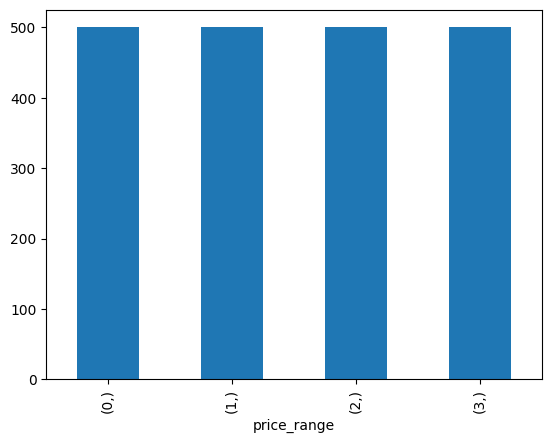

In [11]:
Y.value_counts().plot(kind='bar')

## Perform preprocessing and data cleaning

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [13]:
num_pipe = make_pipeline(
    StandardScaler(),
    SimpleImputer(strategy='median')
).set_output(transform='pandas')

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Split the data into training and testing

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=42)

In [16]:
xtrain.shape

(1600, 20)

In [17]:
xtest.shape

(400, 20)

In [18]:
ytrain.shape

(1600, 1)

In [19]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


## Preprocess the categorical feature- Y : Multiclass classification

In [20]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [22]:
ytrain_cat[:5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

## Model Building

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout
from keras.callbacks import EarlyStopping

## Early Stopping
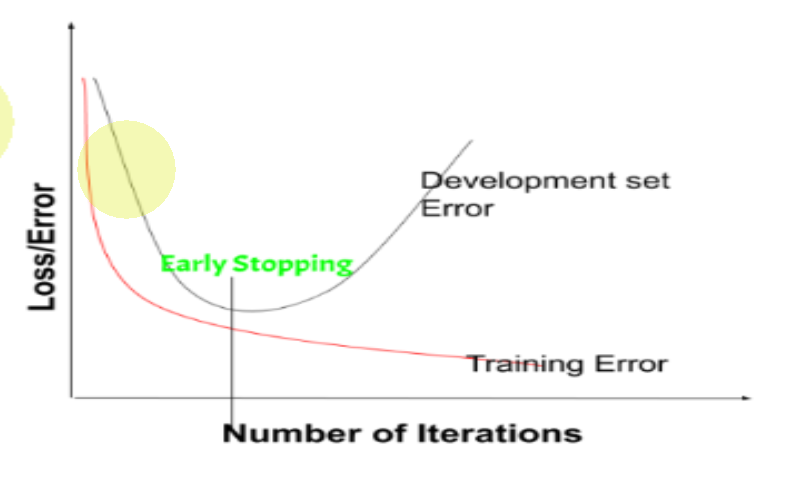

In [24]:
# Intialize the model
model = Sequential()

# Add the Input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the hidden layers
model.add(Dense(units=64,activation='relu'))

# add the dropout layer
model.add(Dropout(rate=0.4))

# Add another hidden layers
model.add(Dense(units=32,activation='relu'))

# add the dropout layer
model.add(Dropout(rate=0.2))

# output layer
model.add(Dense(units=ytrain_cat.shape[1],activation='softmax'))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
es = EarlyStopping(monitor='val_loss',patience=10)

In [28]:
hist = model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=200,callbacks=[es])

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.2525 - loss: 1.5319 - val_accuracy: 0.3500 - val_loss: 1.3358
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3355 - loss: 1.3502 - val_accuracy: 0.4594 - val_loss: 1.2393
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4435 - loss: 1.2312 - val_accuracy: 0.5094 - val_loss: 1.1239
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4877 - loss: 1.1431 - val_accuracy: 0.5594 - val_loss: 0.9997
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5547 - loss: 1.0043 - val_accuracy: 0.6219 - val_loss: 0.8793
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5734 - loss: 0.9185 - val_accuracy: 0.6812 - val_loss: 0.7763
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6198 - loss: 0.8404 - val_accuracy: 0.7312 - val_loss: 0.6898
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6610 - loss: 0.7485 - val_accuracy: 0.7625 - 

In [29]:
model.evaluate(xtrain,ytrain_cat)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9821 - loss: 0.0760


[0.09402134269475937, 0.9737499952316284]

In [30]:
model.evaluate(xtest,ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9458 - loss: 0.1509


[0.16425462067127228, 0.9350000023841858]

## Plot the learning curve

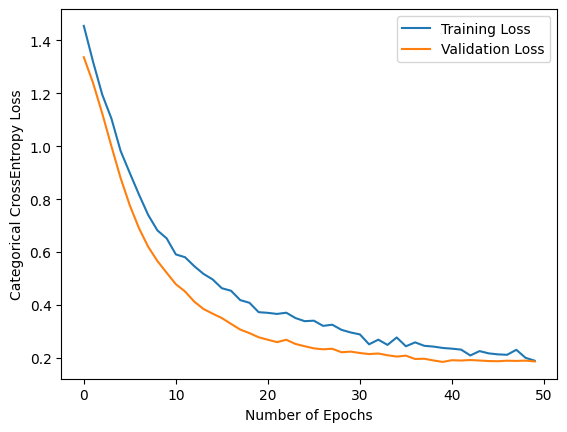

In [33]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label="Training Loss")
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Categorical CrossEntropy Loss")
plt.show()

## Evaluate the model


In [36]:
ytest_probs = model.predict(xtest)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [37]:
ytest_probs[:5]

array([[9.8110229e-01, 1.8897772e-02, 2.8443598e-08, 3.6691640e-22],
       [4.4071906e-09, 4.7212872e-03, 9.9093187e-01, 4.3468662e-03],
       [7.6959222e-03, 9.9072802e-01, 1.5760923e-03, 2.1702029e-11],
       [7.3817501e-24, 2.7434962e-11, 1.0277488e-02, 9.8972255e-01],
       [4.3397546e-03, 9.6716589e-01, 2.8494222e-02, 1.1495639e-07]],
      dtype=float32)

In [41]:
import numpy as np
np.max(ytest_probs,axis=1)

array([0.9811023 , 0.99093187, 0.990728  , 0.98972255, 0.9671659 ,
       0.9870363 , 0.62752706, 0.9953361 , 0.88346004, 0.95949996,
       0.9873542 , 0.6262786 , 0.9746275 , 0.99822766, 0.6161194 ,
       0.729974  , 0.9898672 , 0.9986307 , 0.9929974 , 0.9937471 ,
       0.9977779 , 0.51292586, 0.712646  , 0.96763325, 0.99457586,
       0.69666404, 0.93072   , 0.6875153 , 0.85356337, 0.99901724,
       0.95981604, 0.99978775, 0.990726  , 0.95906645, 0.9117698 ,
       0.98595816, 0.90095294, 0.9761062 , 0.9971642 , 0.8346897 ,
       0.6516341 , 0.97053224, 0.9265464 , 0.99644095, 0.66911405,
       0.8448344 , 0.9784419 , 0.8462747 , 0.9947817 , 0.978516  ,
       0.99901223, 0.9579361 , 0.9940923 , 0.9812329 , 0.6464184 ,
       0.9430036 , 0.97686213, 0.92956185, 0.99976915, 0.9973532 ,
       0.8909798 , 0.9977623 , 0.94325125, 0.8914266 , 0.9919077 ,
       0.9205467 , 0.99889034, 0.99704474, 0.97621745, 0.97995114,
       0.9285053 , 0.94375026, 0.9988331 , 0.8947249 , 0.89011

In [42]:
np.argmax(ytest_probs,axis=1)

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 3, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 1, 3, 2, 0,
       3, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 0, 0, 2, 3, 0, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 0, 2, 2, 3, 3, 0, 0, 0, 3, 1,
       1, 2, 1, 1, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 1, 0, 1, 2, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 2, 2,
       3, 2, 3, 0, 2, 3, 2, 3, 2, 1, 0, 2, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 2, 0, 1, 2, 3, 2, 3, 1, 0, 0, 1, 3, 3,

In [43]:
import numpy as np
ypreds_test = np.argmax(ytest_probs,axis=1)

In [45]:
ypreds_test[:5]

array([0, 2, 1, 3, 1])

In [44]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


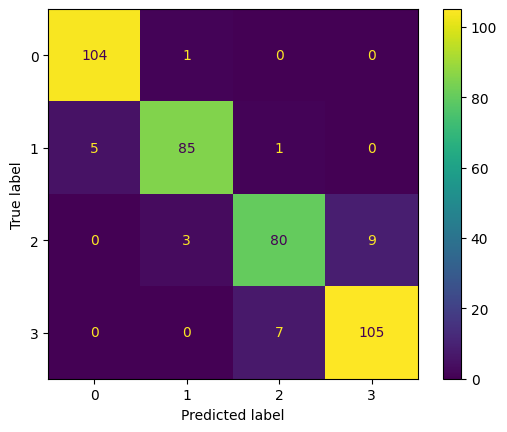

In [46]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
cf = confusion_matrix(ytest,ypreds_test)
ConfusionMatrixDisplay(cf).plot()

In [47]:
print(classification_report(ytest,ypreds_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       105
           1       0.96      0.93      0.94        91
           2       0.91      0.87      0.89        92
           3       0.92      0.94      0.93       112

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.94      0.93       400



## Above model can be considered for out of sample predictions as the model accuracy is greater than 0.8

## SAve the model

In [48]:
model.save("MobilePriceClassification.keras")

## Load the above model

In [49]:
from keras.models import load_model

In [50]:
m = load_model('/content/MobilePriceClassification.keras')
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,670 (41.68 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,114 (27.79 KB)

In [51]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/mobile_test%20(1).csv')
df2.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [52]:
df2 = df2.drop(columns='id')

In [53]:
xnew_pre = num_pipe.transform(df2)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


## Final predictions

In [54]:
probs = model.predict(xnew_pre)
probs[:5]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[5.5508031e-17, 3.3935822e-07, 4.4751742e-01, 5.5248219e-01],
       [1.0500370e-21, 2.5274367e-09, 2.8426863e-02, 9.7157311e-01],
       [1.2440858e-13, 2.0182268e-05, 4.9290818e-01, 5.0707167e-01],
       [1.1502767e-30, 4.6249141e-14, 8.0520846e-04, 9.9919480e-01],
       [7.8781648e-03, 9.8049277e-01, 1.1628824e-02, 2.0397223e-07]],
      dtype=float32)

In [55]:
final_preds = np.argmax(probs,axis=1)
final_preds[:5]

array([3, 3, 3, 3, 1])

In [56]:
df2["Price_Range"] = final_preds

In [57]:
df2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price_Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


## Save the classification results to a csv file

In [58]:
df2.to_csv("MobilePrice predictions.csv")